<a href="https://colab.research.google.com/github/archit-awasthi007/fake_news_detection/blob/main/fake_news.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from wordcloud import WordCloud
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPool1D

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [8]:
fake = pd. read_csv('https://raw.githubusercontent.com/laxmimerit/fake-real-news-dataset/main/data/Fake.csv')
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


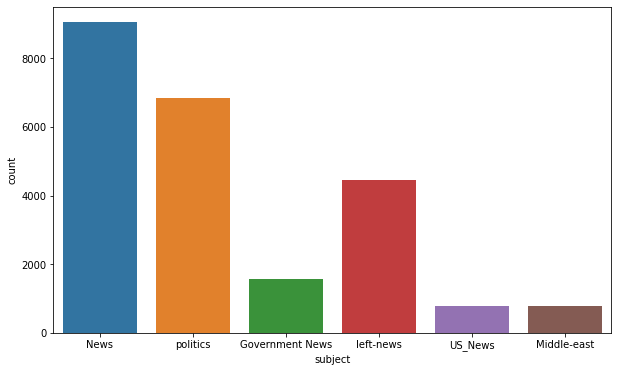

In [9]:
plt.figure (figsize=(10,6))
sns.countplot(x= 'subject' , data=fake);

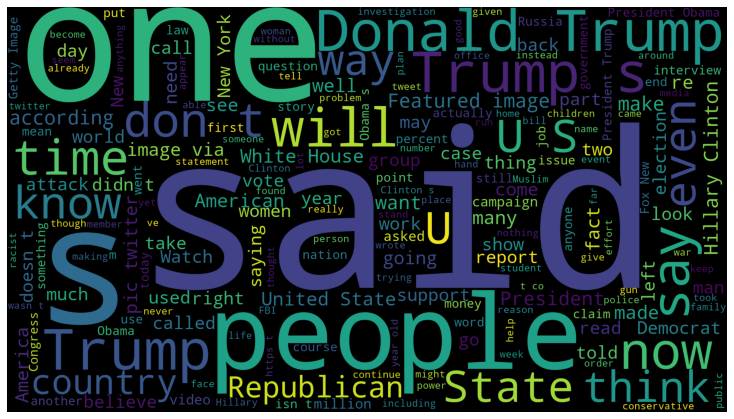

In [11]:
text = ' '.join(fake['text'].tolist())
wordcloud = WordCloud (width=1920, height=1080).generate (text)
fig = plt.figure(figsize=(10, 10))
plt.imshow (wordcloud)
plt.axis ('off')
plt.tight_layout (pad=0)
plt.imshow (wordcloud);

# exploring real news

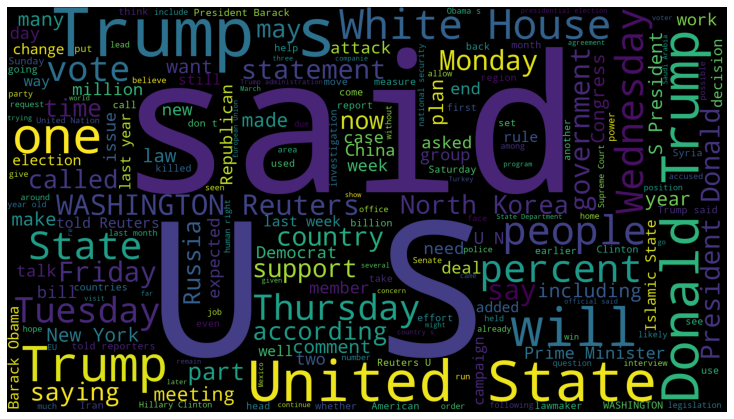

In [12]:
real = pd. read_csv('https://raw.githubusercontent.com/laxmimerit/fake-real-news-dataset/main/data/True.csv')
text = ' '.join(real ['text'].tolist())
wordcloud = WordCloud (width=1920, height=1080).generate (text)
fig = plt.figure(figsize=(10, 10))
plt.imshow (wordcloud)
plt.axis ('off')
plt.tight_layout (pad=0)
plt.imshow (wordcloud);

# Difference in Text

Real news seems to have source of publication which is not present in fake news set
Looking at the data:
* most of text contains reuters information such as "WASHINGTON (Reuters)".
* Some text are tweets from Twitter
* Few Text do not contain any publication info


# Difference in Text

Real news seems to have source of publication which is not present in fake news set
Looking at the data:
* most of text contains reuters information such as "WASHINGTON (Reuters)".
* Some text are tweets from Twitter
* Few Text do not contain any publication info


In [13]:
real.sample(5)

,title,text,subject,date
1182,Judge blocks latest Trump curbs on people ente...,SAN FRANCISCO/WASHINGTON (Reuters) - A U.S. ju...,politicsNews,"October 17, 2017"
503,U.S. budget chief Mulvaney says CFPB staff sho...,WASHINGTON (Reuters) - U.S. budget chief Mick ...,politicsNews,"November 28, 2017"
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017"
4078,Trump's concession on wall funding removes obs...,WASHINGTON (Reuters) - The threat of a U.S. go...,politicsNews,"April 25, 2017"
20966,Putin to meet South Korean President to discus...,MOSCOW (Reuters) - Russian President Vladimir ...,worldnews,"September 5, 2017"


In [14]:
unknown_publishers = []
for index, row in enumerate(real.text.values):
 try:
   record = row.split('-', maxsplit=1)
   record[1]

   assert (len (record[0])<260)
 except:
   unknown_publishers.append(index)

In [15]:
real.iloc[unknown_publishers].text
publisher = []
tmp_text= []


for index, row in enumerate (real.text.values):
 if index in unknown_publishers:
    tmp_text.append(row)
    publisher.append('Unknown')
 else:
    record = row.split('-', maxsplit=1)
    publisher.append(record[0].strip())
    tmp_text.append(record[1].strip())

In [16]:
real['publishers']=publisher
real['text']=tmp_text
real.head()

,title,text,subject,date,publishers
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction ...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fir...,politicsNews,"December 29, 2017",WASHINGTON (Reuters)
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links bet...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos tol...,politicsNews,"December 30, 2017",WASHINGTON (Reuters)
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Post...,politicsNews,"December 29, 2017",SEATTLE/WASHINGTON (Reuters)


In [17]:
empty_fake_index= [index for index, text in enumerate (fake.text.tolist()) if str(text).strip()==""]
fake.iloc[empty_fake_index]

,title,text,subject,date
10923,TAKE OUR POLL: Who Do You Think President Trum...,,politics,"May 10, 2017"
11041,Joe Scarborough BERATES Mika Brzezinski Over “...,,politics,"Apr 26, 2017"
11190,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,politics,"Apr 6, 2017"
11225,MAYOR OF SANCTUARY CITY: Trump Trying To Make ...,,politics,"Apr 2, 2017"
11236,SHOCKER: Public School Turns Computer Lab Into...,,politics,"Apr 1, 2017"
...,...,...,...,...
21816,BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...,,left-news,"Apr 27, 2015"
21826,FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...,,left-news,"Apr 25, 2015"
21827,(VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...,,left-news,"Apr 25, 2015"
21857,(VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...,,left-news,"Apr 14, 2015"


In [19]:
real['text'] = real['title'] + " " + real['text']
fake['text'] = fake['title'] + ""+fake['text']

real['text'] = real['text'].apply(lambda x: str(x).lower())
fake['text'] = fake['text'].apply(lambda x: str(x).lower())

# preprocessing text

In [20]:
real['class']=1
fake['class']=0

In [21]:
real=real[['text','class']]
fake=fake[['text','class']]

data = real.append(fake,ignore_index = True)
data.sample(5)

,text,class
97,trump on twitter (dec 18) - congressional race...,1
41516,federal judge goes on rant about cops killing ...,0
11484,macron's europe reforms in focus in german coa...,1
15577,mattis backs geneva process on syrian conflict...,1
31225,is this dem senator switching parties? calls o...,0


In [ ]:
# https://github.com/laxmimerit/preprocess_kgptalkie
!pip install spacy==2.2.3
!python -m spacy download en_core_web_sm
!pip install beautifulsoup4==4.9.1
!pip install textblob==0.15.3

In [ ]:
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

In [6]:
import preprocess_kgptalkie as ps

In [22]:
data['text'] = data['text'].apply(lambda x: ps.remove_special_chars(x))

In [23]:
ps.remove_special_chars('this,. @ # is gre@t')
'this is gret'

'this is gret'

In [24]:
data.head()

,text,class
0,as us budget fight looms republicans flip thei...,1
1,us military to accept transgender recruits on ...,1
2,senior us republican senator let mr mueller do...,1
3,fbi russia probe helped by australian diplomat...,1
4,trump wants postal service to charge much more...,1


# Vectorization -- Word2Vec
* Word2Vec is one of the most popular technique to learn word embeddings using shallow neural network. 
* It was developed by Tomas Mikolov in 2013 at Google.
* Word embedding is the most popular representation of document vocabulary. It is capable of capturing context of a word in a document, semantic and syntactic similarity, relation with other words, etc.

In [25]:
import gensim

In [26]:
y=data['class'].values

In [28]:
X=[d.split() for d in data['text'].tolist()]
type(X[0])

list

In [29]:
print(X[0])

['as', 'us', 'budget', 'fight', 'looms', 'republicans', 'flip', 'their', 'fiscal', 'script', 'the', 'head', 'of', 'a', 'conservative', 'republican', 'faction', 'in', 'the', 'us', 'congress', 'who', 'voted', 'this', 'month', 'for', 'a', 'huge', 'expansion', 'of', 'the', 'national', 'debt', 'to', 'pay', 'for', 'tax', 'cuts', 'called', 'himself', 'a', 'fiscal', 'conservative', 'on', 'sunday', 'and', 'urged', 'budget', 'restraint', 'in', '2018', 'in', 'keeping', 'with', 'a', 'sharp', 'pivot', 'under', 'way', 'among', 'republicans', 'us', 'representative', 'mark', 'meadows', 'speaking', 'on', 'cbs', 'face', 'the', 'nation', 'drew', 'a', 'hard', 'line', 'on', 'federal', 'spending', 'which', 'lawmakers', 'are', 'bracing', 'to', 'do', 'battle', 'over', 'in', 'january', 'when', 'they', 'return', 'from', 'the', 'holidays', 'on', 'wednesday', 'lawmakers', 'will', 'begin', 'trying', 'to', 'pass', 'a', 'federal', 'budget', 'in', 'a', 'fight', 'likely', 'to', 'be', 'linked', 'to', 'other', 'issues',

In [30]:
DIM = 100
w2v_model = gensim.models.Word2Vec(sentences=X, size=DIM, window=10, min_count=1)

In [ ]:
len(w2v_model.wv.vocab)